# Super Easy to use! Move into working directory and type the next line.

In [1]:
import MyML
import numpy as np

## Let's make some data so we can test these things.

In [2]:
X = np.matrix(np.random.randn(150,4))
Yreg = X*3 + 3
Yreg1dim = Yreg[:,0]
Y = np.rint(Yreg)
Yclass = np.eye(Y.shape[1])[np.argmax(Y,axis = 1)][:,0,:]
Yclass1dim = np.matrix(Yclass[:,0]).T

Xval = np.matrix(np.random.randn(150,4))
Yregval = Xval*3 + 3
Yreg1dimval = Yregval[:,0]
Yval = np.rint(Yregval)
Yclassval = np.eye(Yval.shape[1])[np.argmax(Yval,axis = 1)][:,0,:]
Yclass1dimval = np.matrix(Yclassval[:,0]).T

## Let's work our way up to the complicated stuff. That means we'll start with simple linear regression.

### Closed Form should you desire. With or without L2 Regularization.

In [3]:
linModel1dimClosed = MyML.TSRegression(features = 4, outputs = 1)

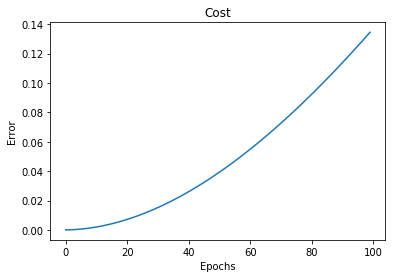

In [6]:
linModel1dimClosed.train(X,Yreg1dim,closedForm = False, l2 = .001)

In [5]:
linModel1dimClosed.weights

matrix([[2.99997934e+00],
        [2.99998021e+00],
        [2.96614390e-06],
        [4.83947115e-07],
        [4.86671591e-07]])

### Gradient Descent

In [9]:
linModel1dim = MyML.TSRegression(features = 4, outputs = 1)

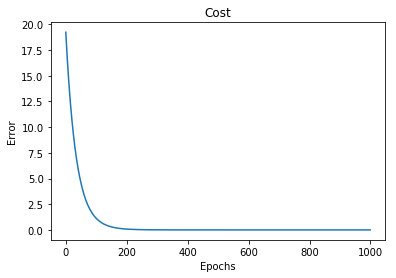

In [10]:
linModel1dim.train(X,Yreg1dim, epochs = 1000, lr = .0001, l1 = .0001)

In [8]:
linModel1dim.weights

matrix([[ 3.45499709e+07],
        [-4.31918319e+07],
        [ 3.33241783e+07],
        [-4.17554920e+07],
        [-1.34324350e+08]])

## Now for multiple linear regression.

In [15]:
linModel = MyML.TSRegression(features = 4, outputs = 4)

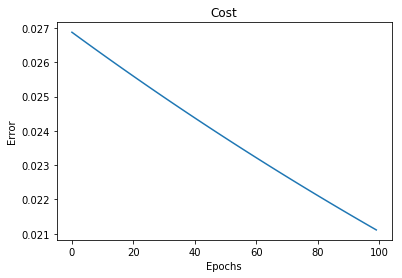

In [46]:
linModel.train(X, Yreg)

In [14]:
np.mean(linModel.predict(X) - 3*X - 3)

-1.983598470663613e-16

In [12]:
linModel = MyML.TSRegression(features = 4, outputs = 4)

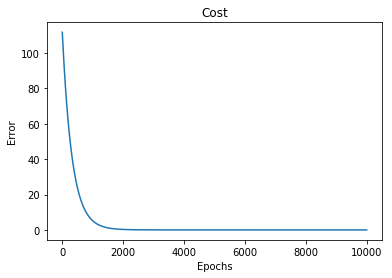

In [13]:
linModel.train(X, Yreg, epochs = 10000)

In [14]:
np.mean(linModel.predict(X) - 3*X - 3)

-1.0816387701921096e-06

## Logistic Regression

### One output dimension

In [15]:
logModeldim1 = MyML.TSLogisticRegression(features = 4, outputs = 1)

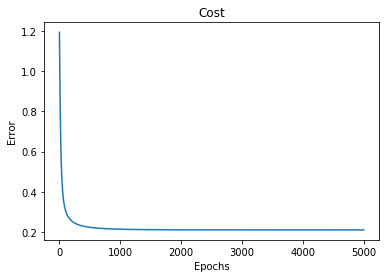

In [16]:
logModeldim1.train(X,Yclass1dim,Xval,Yclass1dimval, epochs = 5000, lr =.001)

In [17]:
np.mean(logModeldim1.predict(Xval) == Yclass1dimval)

0.9

### Multiple output dimensions

In [18]:
logModel = MyML.TSLogisticRegression(features = 4, outputs = 4)

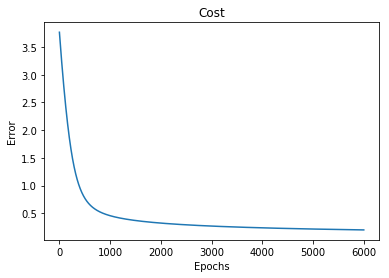

In [19]:
logModel.train(X,Yclass,lr = .0001, epochs = 6000)

In [20]:
print(np.mean(logModel.predict(X) == Yclass))

0.9866666666666667


## Now for Neural Networks
### First as a regression

In [3]:
NNmodelreg1dim = MyML.TSNN(indims = 4, nodes = [6,6,1],activation = 'relu', taskType = 'r')

Weights not previously initialized. Initializing now.


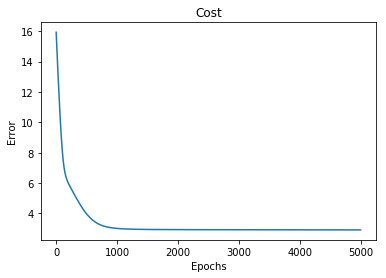

In [4]:
NNmodelreg1dim.train(X,Yreg1dim, epochs = 5000)

#### Since this is roughly the equivalent of linear regression with a bunch of basis functions the SSE that's reported in the graph above is fairly self explanatory.

### Multiple Regression

In [5]:
NNmodelreg = MyML.TSNN(indims = 4, nodes = [6,6,4], taskType = 'r')

Weights not previously initialized. Initializing now.


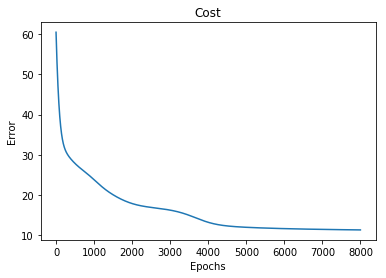

In [6]:
NNmodelreg.train(X,Yreg, epochs = 8000)

### Classification of single output

In [7]:
NNmodelclass1dim = MyML.TSNN(indims = 4, nodes = [6,6,1], taskType = 'c')

Weights not previously initialized. Initializing now.


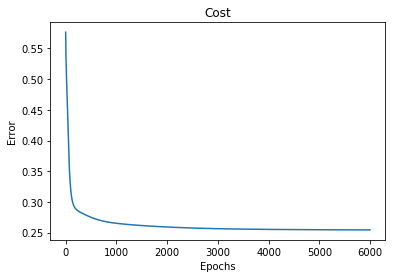

In [8]:
NNmodelclass1dim.train(X, Yclass1dim, lr = .001,epochs = 6000)

In [9]:
np.mean(NNmodelclass1dim.predict(Xval) == Yclass1dimval)

0.88

### Last but not least multiple classification.

In [10]:
NNmodelclass = MyML.TSNN( indims = 4, nodes = [6,6,4],activation = 'tanh', taskType = 'c')

Weights not previously initialized. Initializing now.


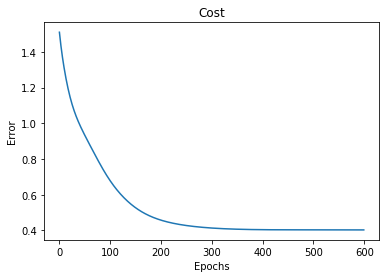

In [11]:
NNmodelclass.train(X,Yclass,Xval,Yclassval, lr =.001, epochs = 600)

In [12]:
np.mean(NNmodelclass.predict(Xval) == Yclassval)

0.91